<a href="https://colab.research.google.com/github/Wounaa/2024_Geoinformatique_I/blob/main/louexercice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Cr√©er de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des donn√©es √† partir de fichiers `.npy` * Effectuer des r√©ductions (par exemple `.npy`)
* Effectuer des r√©ductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* R√©aliser des trac√©s lin√©aires 1D
* R√©aliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce probl√®me, nous utilisons des donn√©es r√©elles provenant de flotteurs de profilage oc√©anique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des donn√©es sur la temp√©rature, la salinit√© et la pression de l'oc√©an. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures √† diff√©rentes profondeurs ou "niveaux").

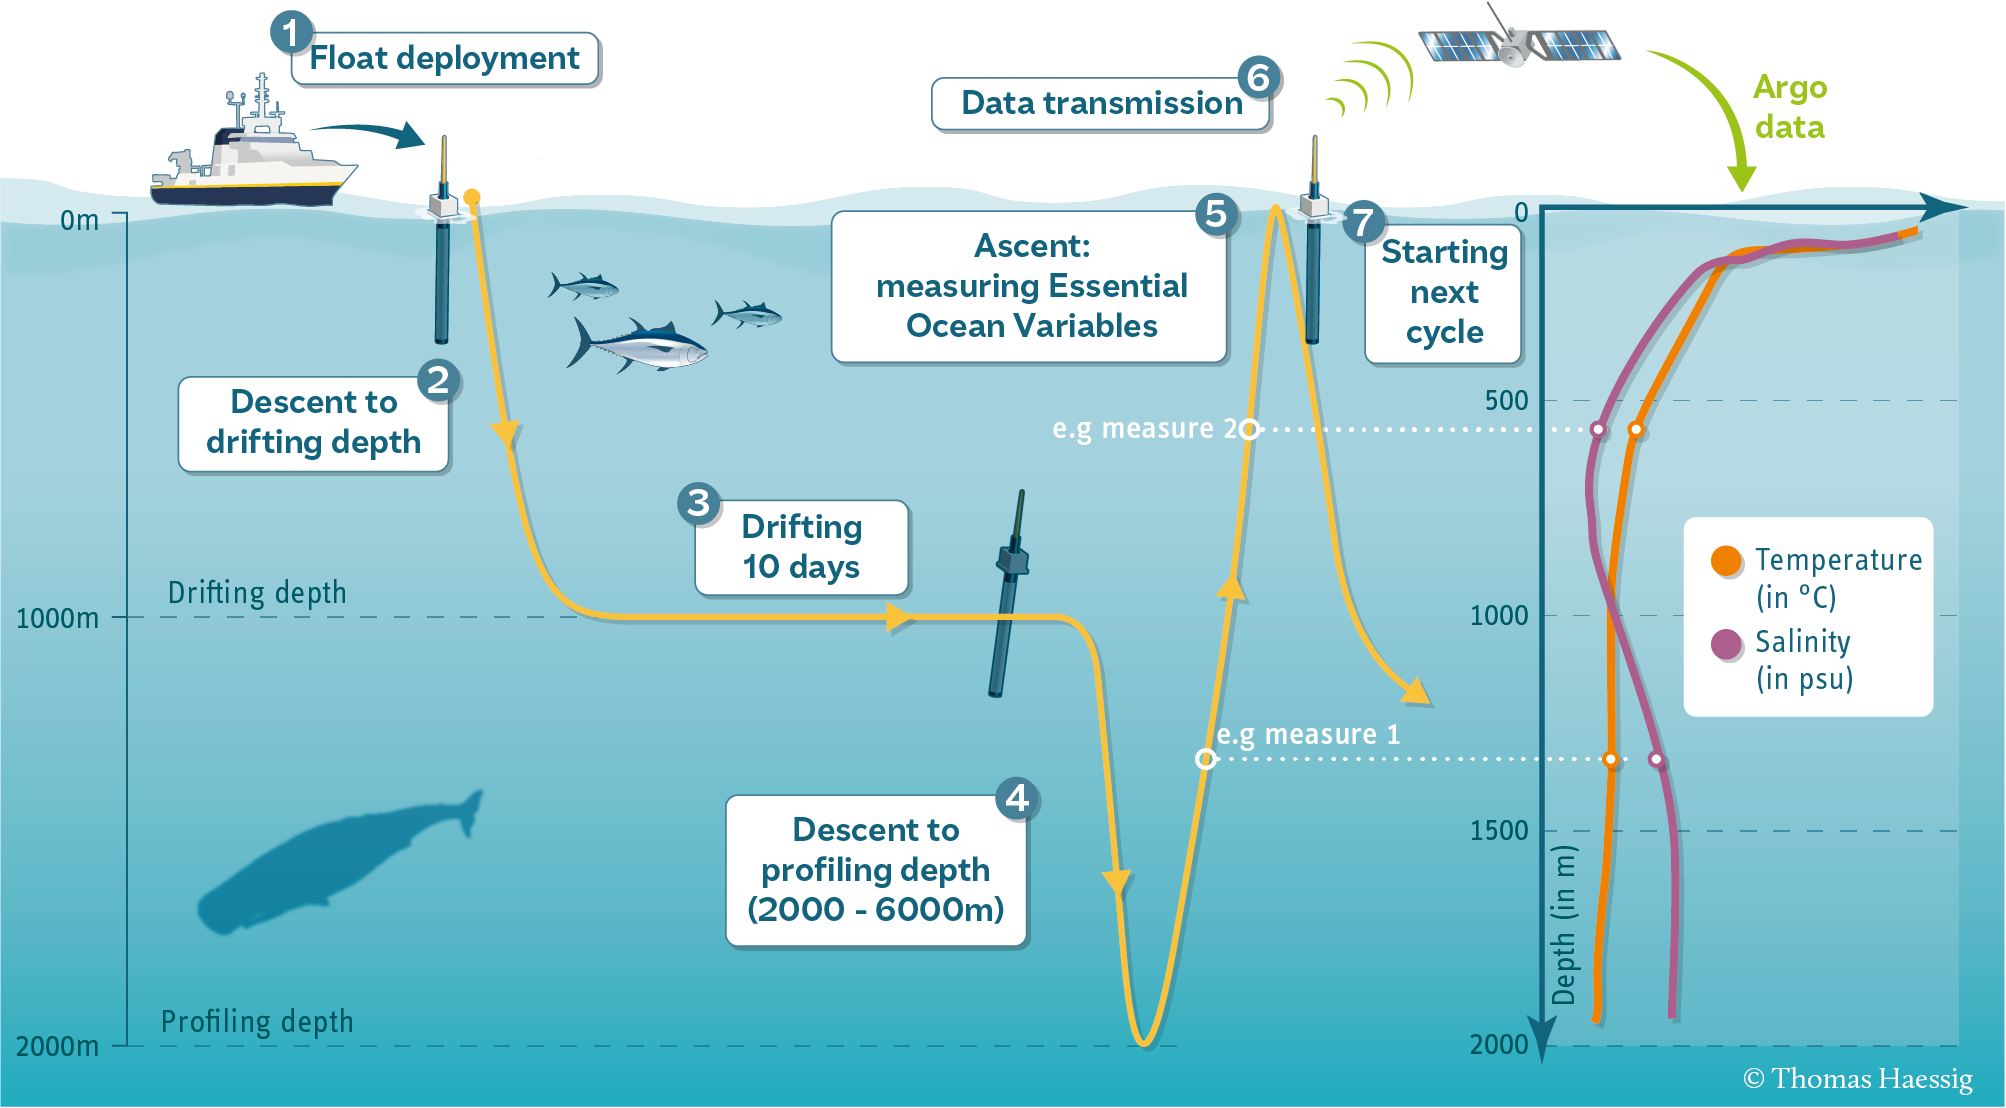


Chaque profil est associ√© √† une latitude, une longitude et une date, ainsi qu'√† de nombreux niveaux diff√©rents.

Commen√ßons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour t√©l√©charger les fichiers de donn√©es dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir √† l'√©tape suivante.

In [1]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy']

In [2]:
import numpy as np

**Q1) Chargez chaque fichier de donn√©es sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : temp√©rature

`S` : salinit√©

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les √©l√©ments dans `files`) pour savoir quel fichier correspond √† quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des √©l√©ments des fichiers ici

In [4]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy']

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compr√©hension de liste

In [15]:
import numpy as np
P = np.load(files[0])
print (P.shape);
S=np.load (files[1])
print (S.shape)

(78, 75)
(78, 75)


In [19]:
#@title Code √† compl√©ter (au besoin)
P,S,levels,lat,date,T,lon = [np.load(files[i]) for i in range(len(files))]

**Q2) Recr√©ez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [√† ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [20]:
print (levels.shape)
print (levels)

(78,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recr√©ez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [22]:
level_arange=np.arange(78)

In [ ]:
#@title Code √† compl√©ter (au besoin)
level_arange = np.arange(___,___)

V√©rifiez que `level` et `level_arange` sont √©gaux en utilisant `np.testing.assert_equal`

In [25]:
np.testing.assert_equal(level_arange, levels, err_msg='Les tableaux sont diff√©rents', verbose=True)

In [ ]:
#@title Code √† compl√©ter (au besoin)
np.___.___(___,level_arange)

Recr√©er le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [39]:
level_linspace=np.linspace(0,77,78)
print(level_linspace.shape)

(78,)


In [32]:
#@title Code √† compl√©ter (au besoin)
___ = np.___(___,___,___)

AttributeError: module 'numpy' has no attribute '___'

V√©rifiez que `level` et `level_linspace` sont √©gaux en utilisant `np.testing.assert_equal`

In [40]:
np.testing.assert_equal(level_linspace, levels, err_msg='Les tableaux sont diff√©rents', verbose=True)

In [ ]:
#@title Code √† compl√©ter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport √† `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont li√©s ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables charg√©es

In [42]:
print(T.shape)
print(S.shape)
print(P.shape)
print(lon.shape)
print(lat.shape)
print(levels.shape)

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(78,)


In [ ]:
#@title Code √† compl√©ter (au besoin)
___.shape
___.___

D'apr√®s les formes, quelles sont les dimensions partag√©es entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densit√© de l'eau de mer `relative_density`, par rapport √† l'eau pure, en fonction de la temp√©rature, de la salinit√© et de la pression.**

`densit√©_relative`$ = œÅ -œÅ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

o√π :

* Les densit√©s $\rho$ et $œÅ_{Pure\ eau}$ sont exprim√©es en unit√©s $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la temp√©rature conservative $\Theta$ (en unit√©s Celcius) √† partir de la temp√©rature, de la salinit√© et de la pression est fournie ci-dessous.
* La temp√©rature $T$ est exprim√©e en unit√©s Celcius.
* La salinit√© $S$ est exprim√©e en unit√©s $g/kg$.
* La pression $p$ est exprim√©e en unit√©s $dbar$.

Astuce : Les tableaux `numpy` charg√©s `temperature`, `salinity`, et `pressure` ont d√©j√† les bonnes unit√©s et aucune conversion n'est n√©cessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [43]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la biblioth√®que [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la temp√©rature conservative $\Theta$ √† partir de la temp√©rature, de la salinit√© et de la pression.

In [44]:
!pip install gsw
from gsw import CT_from_t

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 23.7 MB/s eta 0:00:00


Maintenant, c'est √† vous de jouer. Voici l'√©quation pour √©viter d'avoir √† faire d√©filer la page vers le haut :

`densit√©_relative`$ = œÅ -œÅ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la temp√©rature conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [50]:
O=np.zeros((78,75))
print(O.shape)
for i in range (len(levels)):
  O[i]=CT_from_t(S[i],T[i],P[i])
densite_relative=a*S+b*O+c*O**2
print(densite_relative.shape)

(78, 75)
(78, 75)


In [53]:
#@title Code √† compl√©ter (au besoin)
O = CT_from_t(S,T,P)
print(O.shape)

(78, 75)


Calculez la "densit√© relative" √† l'aide de l'√©quation ci-dessus.

In [54]:
densite_relative=a*S+b*O+c*O**2
print(densite_relative.shape)

(78, 75)


In [ ]:
#@title Code √† compl√©ter (au besoin)
___ = ___

**Q4) Faites un graphique pour chaque colonne de donn√©es dans `T`, `S`, `P`, et
`densit√©_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la biblioth√®que [Matplotlib](https://matplotlib.org/) pour la visualisation, m√™me si nous ne l'avons pas encore √©tudi√©e en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles √† suivre ci-dessous. üòä

La premi√®re √©tape consiste √† importer Pyplot. Il suffit d'ex√©cuter le code ci-dessous.

In [55]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'oc√©an, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en d√©duire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'√©chelle verticale doit utiliser les donn√©es `level` pour √™tre coh√©rente avec les conventions oc√©anographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de donn√©es. Le r√©sultat sera d√©sordonn√©, comme dans le graphique ci-dessous :

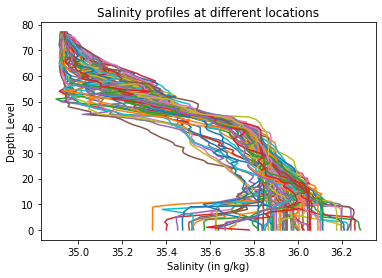

Text(0.5, 1.0, 'Salinity profiles at different locations')

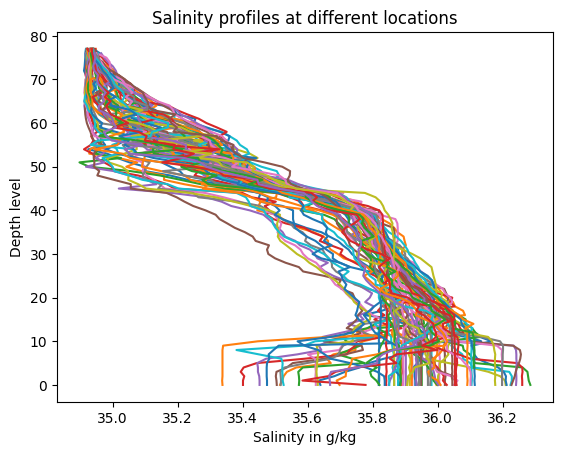

In [59]:
plt.plot(S,levels) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel("Salinity in g/kg") # Prend une cha√Æne de caract√®res comme argument
plt.ylabel("Depth level")
plt.title("Salinity profiles at different locations")

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Temperature profiles at different locations')

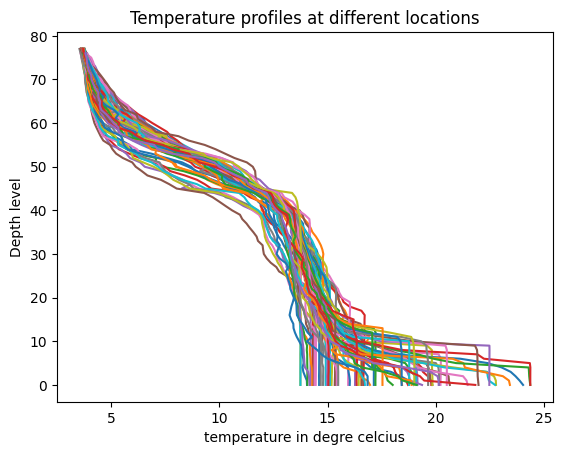

In [58]:
plt.plot(T,levels) ;
plt.xlabel("temperature in degre celcius")
plt.ylabel("Depth level")
plt.title("Temperature profiles at different locations")

Text(0.5, 1.0, 'Pression profiles at different locations')

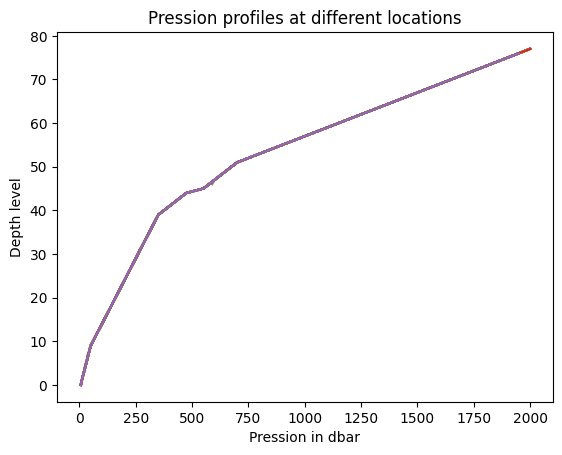

In [60]:
plt.plot(P,levels) ;
plt.xlabel("Pression in dbar")
plt.ylabel("Depth level")
plt.title("Pression profiles at different locations")

Text(0.5, 1.0, 'Densite relative profiles at different locations')

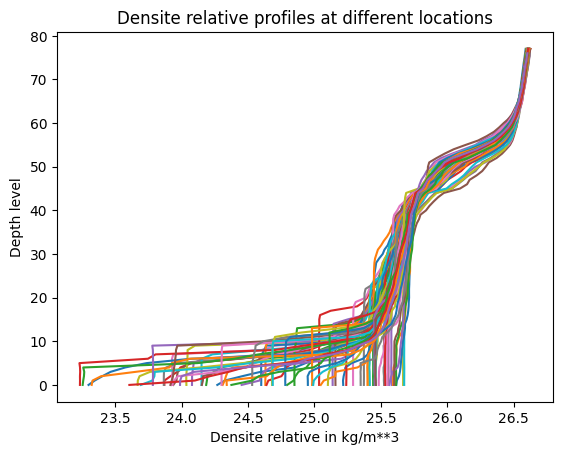

In [61]:
plt.plot(densite_relative,levels) ;
plt.xlabel("Densite relative in kg/m**3")
plt.ylabel("Depth level")
plt.title("Densite relative profiles at different locations")

**Q5) Calculez la moyenne et l'√©cart-type de `T`, `S`, `P`, et `seawater_density` √† chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez v√©rifier que vous avez pris la moyenne et les √©carts types le long des axes corrects en v√©rifiant la "forme" de vos r√©sultats.

Calculez les moyennes...

In [77]:
ms=np.mean(S,1)
mt=np.mean(T,1)
mp=np.mean(P,1)
md=np.mean(densite_relative,1)

In [ ]:
#@title Code √† compl√©ter (au besoin)
___ = np.___(___,axis=___)
___
___
___

... et les √©carts types.

In [78]:
ets=np.std(S,1)
ett=np.std(T,1)
etp=np.std(P,1)
etd=np.std(densite_relative,1)

In [ ]:
#@title Code √† compl√©ter (au besoin)
___ = ___.___(___,___)

V√©rifiez qu'elles ont la m√™me forme que vos coordonn√©es de niveau vertical `lev` :

In [79]:
print (ms.shape)
print(ets.shape)
print (mp.shape)
print(etp.shape)

(78,)
(78,)
(78,)
(78,)


In [ ]:
#@title Code √† compl√©ter (au besoin)
np.testing.assert_equal(___.shape,lev.shape)

**Q6) Faites maintenant des trac√©s similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densit√©_de_l'eau_de_mer` √† chaque profondeur. Faites appara√Ætre les barres d'erreur sur chaque graphique en utilisant les √©carts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires √† celui ci-dessous

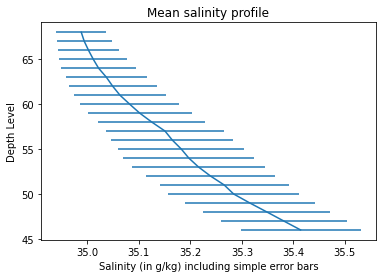

Text(0.5, 1.0, 'Mean salinity profile')

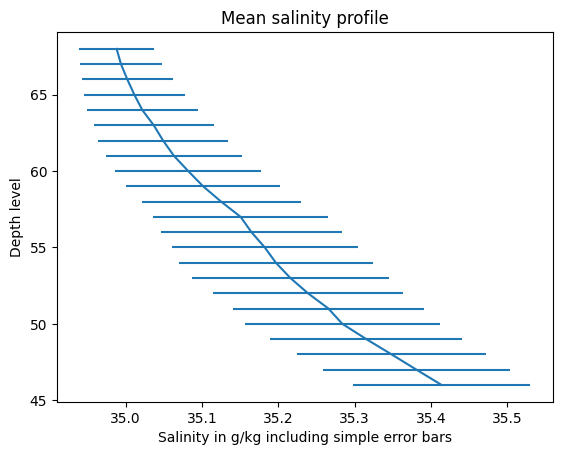

In [71]:
plt.errorbar(ms,levels,xerr=ets)
plt.xlabel("Salinity in g/kg including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")

Encore trois plots et nous serons pr√™ts üôÇ .

Text(0.5, 1.0, 'Mean temperature profile')

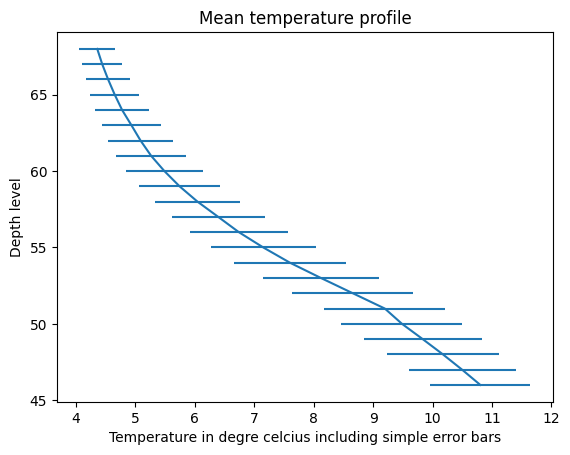

In [72]:
plt.errorbar(mt,levels,xerr=ett)
plt.xlabel("Temperature in degre celcius including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean temperature profile")

Text(0.5, 1.0, 'Mean pression profile')

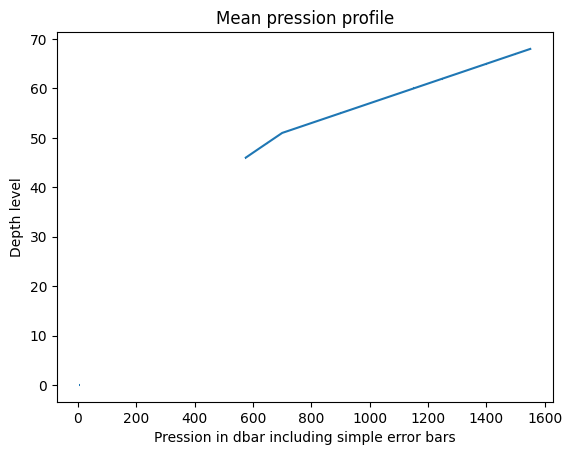

In [76]:
plt.errorbar(mp,levels,xerr=etp)
plt.xlabel("Pression in dbar including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean pression profile")

Text(0.5, 1.0, 'Mean densite relative profile')

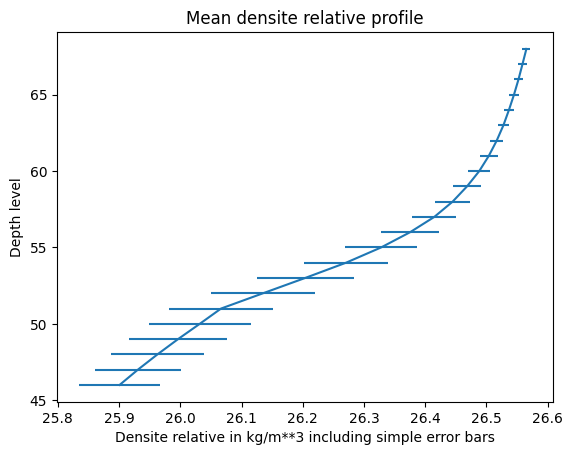

In [75]:
plt.errorbar(md,levels,xerr=etd)
plt.xlabel("Densite relative in kg/m**3 including simple error bars")
plt.ylabel("Depth level")
plt.title("Mean densite relative profile")

**Q7) Prise en compte des donn√©es manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiqu√©es par la valeur sp√©ciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'√©cart type des donn√©es contenant des NaN, le r√©sultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions sp√©ciales `np.nanmean` et `np.nanstd`, vous dites √† NumPy d'ignorer les NaN.

Recalculez les moyennes et les √©carts types comme dans les sections pr√©c√©dentes en utilisant ces fonctions et tracez les r√©sultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous esp√©rons que vous pouvez maintenant trouver la syntaxe compl√®te vous-m√™me üòé

In [82]:
nms=np.nanmean(S,1)
nmt=np.nanmean(T,1)
nmp=np.nanmean(P,1)
nmd=np.nanmean(densite_relative,1)

De m√™me, recalculez les √©carts types en ignorant les valeurs manquantes.

In [81]:
nets=np.nanstd(S,1)
nett=np.nanstd(T,1)
netp=np.nanstd(P,1)
netd=np.nanstd(densite_relative,1)

**Q8) Cr√©ez un diagramme de dispersion des coordonn√©es longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parl√© dans le tutoriel, mais il existe une fonction de diagramme de dispersion tr√®s pratique appel√©e [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos √©tiquettes en ajoutant un argument `fontsize=` aux fonctions d'√©tiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) list√©s dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Relation entre la densit√© et la salinit√©')

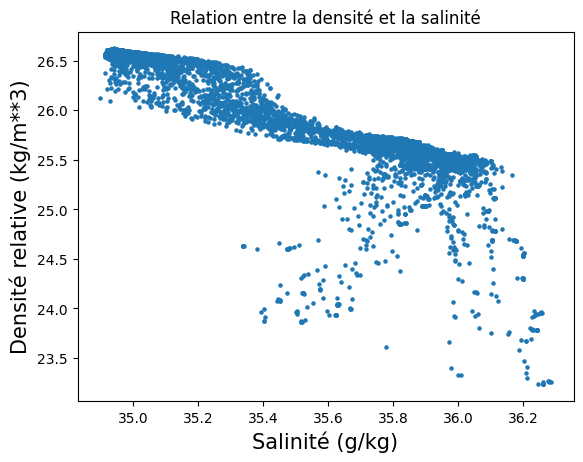

In [103]:
#@title Code √† compl√©ter (au besoin)
plt.scatter(S, densite_relative, s=5)
plt.xlabel("Salinit√© (g/kg)", fontsize=15)
plt.ylabel("Densit√© relative (kg/m**3)", fontsize=15)
plt.title("Relation entre la densit√© et la salinit√©")
#___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [104]:
planetdict = {'mercure':0.330,'v√©nus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [112]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183

def convertKgToMterre(planetname):
  return (planetdict[planetname]/planetdict["terre"])



In [ ]:
#@title Code √† compl√©ter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(______=____):
  return _________/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(____________)

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-cl√© que vous avez sp√©cifi√©**.

In [114]:
# √âcrivez votre fonction ici

# V√©rifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)

res=convertKgToMterre("jupiter")
print(res)

317.92294807370183


In [ ]:
#@title Code √† compl√©ter (au besoin)
# √âcrivez votre fonction ici
def convert_m_Mterrejupiter(______=____,ourplanet='jupiter') :
  return ___________/planetdict[ourplanet]

# V√©rifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],_____),convert_m_Mterrejupiter(planetdict['jupiter'],______))

In [116]:
# Stocker le Mjupiter pour Q3
res=convertKgToMterre("jupiter")

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unit√© que vous avez choisie [la plan√®te que vous voulez]).

In [ ]:
# √âcrivez votre fonction ici
# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unit√© choisie (par exemple, la plan√®te Mars)

In [118]:
#@title Code √† compl√©ter (au besoin)
# √âcrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet='mars') :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict[planet] # La plan√®te que vous voulez utiliser comme r√©f√©rence
  return a,b
# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unit√© choisie (par exemple, la plan√®te Mars)
print(mass_conversion_two_arguments(res,planet='mars'))

(53.25342513797351, 495.20708422694986)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unit√© que vous avez choisie
# Retrouvez-vous la valeur originale ?